In [1]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
# Load pre-split data (created in Notebook 1)
train_data = pd.read_csv('train_data.csv')
test_data  = pd.read_csv('test_data.csv')
print("Train:", train_data.shape, "| Test:", test_data.shape)


Train: (297960, 785) | Test: (74491, 785)


In [3]:
# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test  = test_data.drop('label', axis=1).values
y_test  = test_data['label'].values

In [4]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [5]:
# Reshape for CNN input (28×28×1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat  = to_categorical(y_test,  num_classes=26)

print("Input shape:", X_train.shape, "Labels:", y_train_cat.shape)


Input shape: (297960, 28, 28, 1) Labels: (297960, 26)


In [7]:
# BUILD CNN MODEL
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.summary()


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,706 (1.62 MB)

 Trainable params: 423,706 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# TRAINING
es = EarlyStopping(patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_cnn_model.keras', save_best_only=True)

history = model_cnn.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=25,
    batch_size=128,
    callbacks=[es, mc],
    verbose=2
)

Epoch 1/25
2096/2096 - 42s - 20ms/step - accuracy: 0.7236 - loss: 0.9537 - val_accuracy: 0.9178 - val_loss: 0.2938
Epoch 2/25
2096/2096 - 41s - 20ms/step - accuracy: 0.8961 - loss: 0.3565 - val_accuracy: 0.9494 - val_loss: 0.1826
Epoch 3/25
2096/2096 - 42s - 20ms/step - accuracy: 0.9248 - loss: 0.2595 - val_accuracy: 0.9605 - val_loss: 0.1401
Epoch 4/25
2096/2096 - 41s - 20ms/step - accuracy: 0.9401 - loss: 0.2055 - val_accuracy: 0.9678 - val_loss: 0.1131
Epoch 5/25
2096/2096 - 42s - 20ms/step - accuracy: 0.9502 - loss: 0.1738 - val_accuracy: 0.9724 - val_loss: 0.1018
Epoch 6/25
2096/2096 - 42s - 20ms/step - accuracy: 0.9560 - loss: 0.1541 - val_accuracy: 0.9763 - val_loss: 0.0873
Epoch 7/25
2096/2096 - 41s - 20ms/step - accuracy: 0.9599 - loss: 0.1396 - val_accuracy: 0.9771 - val_loss: 0.0816
Epoch 8/25
2096/2096 - 122s - 58ms/step - accuracy: 0.9631 - loss: 0.1292 - val_accuracy: 0.9791 - val_loss: 0.0778
Epoch 9/25
2096/2096 - 41s - 20ms/step - accuracy: 0.9658 - loss: 0.1200 - val_

In [9]:
# EVALUATION
test_loss, test_acc = model_cnn.evaluate(X_test, y_test_cat, verbose=2)
print(f"\n Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

y_pred = np.argmax(model_cnn.predict(X_test), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, digits=4))


2328/2328 - 7s - 3ms/step - accuracy: 0.9874 - loss: 0.0488

 Test Accuracy: 0.9874 | Test Loss: 0.0488
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

 Classification Report:
              precision    recall  f1-score   support

           0     0.9874    0.9892    0.9883      2774
           1     0.9884    0.9839    0.9861      1734
           2     0.9897    0.9885    0.9891      4682
           3     0.9631    0.9669    0.9650      2027
           4     0.9877    0.9825    0.9851      2288
           5     0.9867    0.9528    0.9694       233
           6     0.9757    0.9774    0.9766      1152
           7     0.9618    0.9758    0.9687      1444
           8     0.9814    0.9420    0.9613       224
           9     0.9786    0.9682    0.9734      1699
          10     0.9792    0.9679    0.9735      1121
          11     0.9738    0.9940    0.9838      2317
          12     0.9894    0.9870    0.9882      2467
          13     0.9807    0.9882    0.9844      3802
          14     

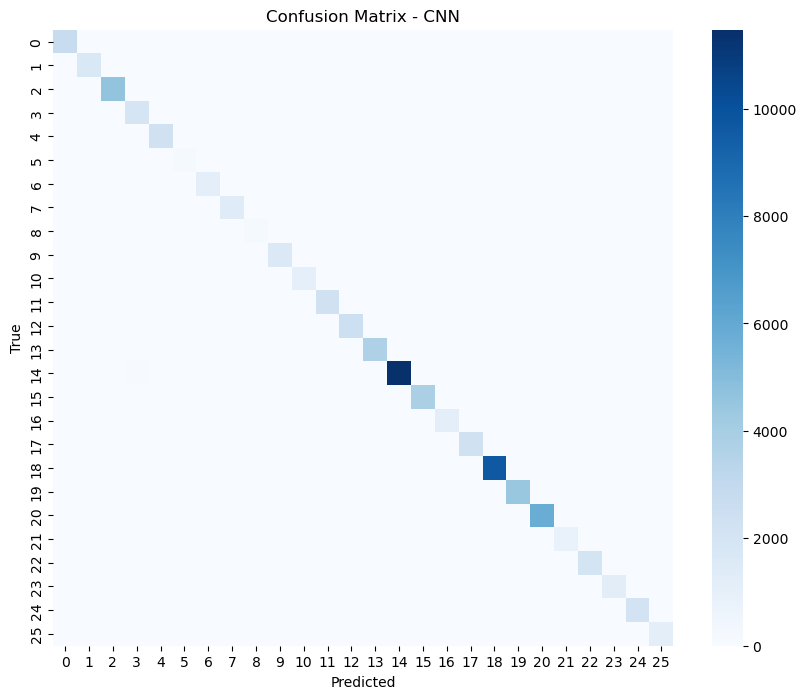

In [10]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

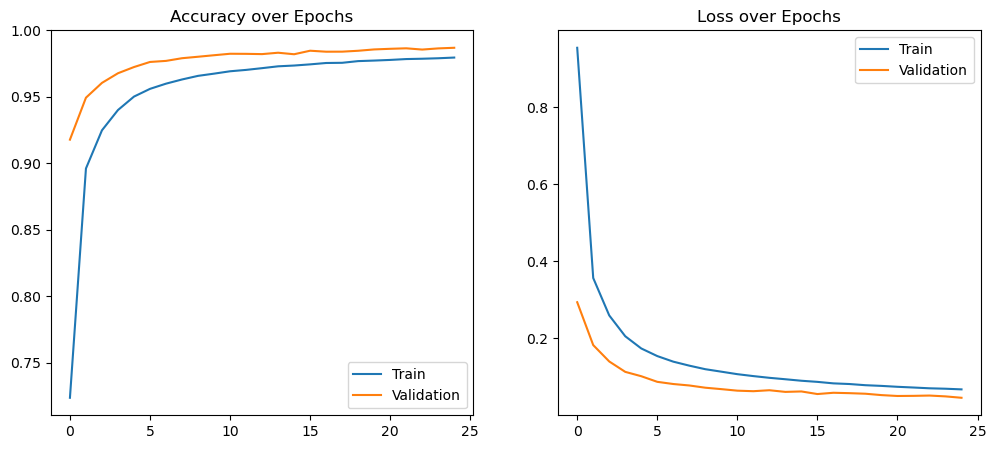

 CNN model training and evaluation complete.


In [11]:
# TRAINING CURVES
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

print(" CNN model training and evaluation complete.")